# Case Study on Probability for Data Science

### Necessary Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Import DataSet

In [26]:
mash_data = pd.read_csv('mushrooms.csv')

In [27]:
#Data Set
mash_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [28]:
mash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [29]:
mash_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Checking Missing Values

In [30]:
mash_data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Label Encoding

In [36]:
encoder = LabelEncoder()
for col in mash_data.columns:
    mash_data[col] = encoder.fit_transform(mash_data[col])
    
mash_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### Split Data Set

In [91]:
x = mash_data.drop('class',axis=1)
y = mash_data['class']

### Standard Scale On X

In [93]:
 # Scaling the data 
sc_x = StandardScaler().fit_transform(x)

### PCA

In [94]:
#Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(sc_x)

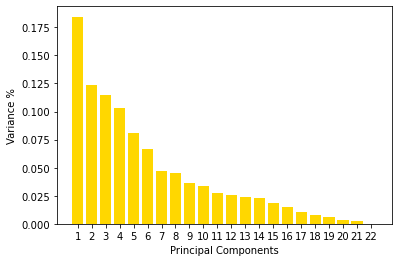

In [95]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

In [97]:
PCA_tab = pd.DataFrame(principalComponents)

In [98]:
pca_x = PCA_tab[[0,1,2,3]]

### Split X,Y

In [99]:
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.2)

# Different ML Classifiers

### Gaussian NBC

In [100]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_test)

In [115]:
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       837
           1       0.92      0.83      0.87       788

    accuracy                           0.88      1625
   macro avg       0.88      0.88      0.88      1625
weighted avg       0.88      0.88      0.88      1625



### Bernoulli NBC

In [102]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
bnb_pred = bnb.predict(x_test)

In [116]:
print(classification_report(y_test,bnb_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       837
           1       0.74      0.79      0.76       788

    accuracy                           0.76      1625
   macro avg       0.76      0.76      0.76      1625
weighted avg       0.76      0.76      0.76      1625



### Logistic Regression

In [104]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [117]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       837
           1       0.92      0.80      0.86       788

    accuracy                           0.87      1625
   macro avg       0.88      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625



### K Nearest Neighbors

In [106]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [121]:
accuracy_score(y_test,knn_pred)

0.9963076923076923

In [120]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       837
           1       1.00      0.99      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Linear SVM

In [108]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)

In [122]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       837
           1       0.95      0.79      0.86       788

    accuracy                           0.87      1625
   macro avg       0.89      0.87      0.87      1625
weighted avg       0.88      0.87      0.87      1625



### Random Forest Classifier

In [110]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [111]:
accuracy_score(y_test,rf_pred)

0.9969230769230769

In [123]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       837
           1       1.00      0.99      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Decision Tree Classifier

In [112]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [124]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       837
           1       0.99      0.99      0.99       788

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

